In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
d2024 = pd.read_csv("pppub24.csv")
d2023 = pd.read_csv("pppub23.csv")
d2022 = pd.read_csv("pppub22.csv")
d2021 = pd.read_csv("pppub21.csv")

data = pd.concat([d2024, d2023, d2022, d2021], ignore_index=True)

rfe_features100 = data[['HHDFMX', 'POTHVAL', 'RESNSS1', 'RESNSS2', 'RESNSSI1', 'RESNSSI2', 'RETCB_VAL', 'RETCB_YN', 'RINT_SC1', 'RINT_SC2', 'RINT_VAL1', 'RINT_VAL2', 'RINT_YN', 'RNT_VAL', 'RNT_YN', 'SRVS_VAL', 'SS_VAL', 'SS_YN', 'SSI_VAL', 'SSI_YN', 'STRKUC', 'SUBUC', 'SUR_SC1', 'SUR_SC2', 'SUR_VAL1', 'SUR_VAL2', 'SUR_YN', 'TRDINT_VAL', 'TSURVAL1', 'TSURVAL2', 'UC_VAL', 'UC_YN', 'VET_QVA', 'VET_TYP1', 'VET_TYP2', 'VET_TYP3', 'VET_TYP4', 'VET_TYP5', 'VET_VAL', 'VET_YN', 'WC_TYPE', 'WC_VAL', 'WC_YN', 'PAW_MON', 'PAW_TYP', 'PAW_VAL', 'PAW_YN', 'PENINCL', 'PENPLAN', 'WICYN', 'CHCARE_YN', 'CHELSEW_YN', 'CHSP_VAL', 'CHSP_YN', 'CSP_VAL', 'CSP_YN', 'ACTC_CRD', 'CTC_CRD', 'DEP_STAT', 'EIT_CRED', 'FEDTAX_AC', 'FEDTAX_BC', 'FICA', 'FILESTAT', 'MARG_TAX', 'PRSWKXPNS', 'STATETAX_A', 'STATETAX_B', 'PERLIS', 'POV_UNIV', 'COV', 'COV_CYR', 'COV_MULT_CYR', 'NOCOV_CYR', 'NOW_COV', 'NOW_PUB', 'PUB', 'PUB_CYR', 'NOW_DEPPRIV', 'NOW_OUTPRIV', 'NOW_OWNPRIV', 'NOW_PRIV', 'OUTPRIV', 'OWNPRIV', 'PRIV', 'PRIV_CYR', 'DEPGRP', 'GRPFTYP', 'GRPFTYP2', 'MRK', 'NOW_CAID', 'NOW_PCHIP', 'NOW_MCARE', 'NOW_IHSFLG', 'NOW_VACARE', 'PECOULD', 'ESIOFFER']]
rfe_features50 = data[['CHCARE_YN', 'CHELSEW_YN', 'CHSP_VAL', 'CHSP_YN', 'CSP_VAL', 'CSP_YN', 'ACTC_CRD', 'CTC_CRD', 'DEP_STAT', 'EIT_CRED', 'FEDTAX_AC', 'FEDTAX_BC', 'FICA', 'FILESTAT', 'MARG_TAX', 'PRSWKXPNS', 'STATETAX_A', 'STATETAX_B', 'PERLIS', 'POV_UNIV', 'COV', 'COV_CYR', 'COV_MULT_CYR', 'NOCOV_CYR', 'NOW_COV', 'NOW_PUB', 'PUB', 'DEPPRIV', 'NOW_DEPPRIV', 'NOW_OUTPRIV', 'NOW_OWNPRIV', 'NOW_PRIV', 'OUTPRIV', 'OWNPRIV', 'PRIV', 'PRIV_CYR', 'GRP', 'GRPFTYP', 'GRPFTYP2', 'NOW_MCAID', 'NOW_CAID', 'NOW_PCHIP', 'NOW_MCARE', 'NOW_IHSFLG', 'ESICOULD']]
rfe_features20 = data[['CSP_VAL', 'CSP_YN', 'FEDTAX_AC', 'FEDTAX_BC', 'FICA', 'FILESTAT', 'PRSWKXPNS', 'STATETAX_A', 'STATETAX_B', 'PERLIS', 'COV_MULT_CYR', 'DEPPRIV', 'NOW_OWNPRIV', 'OWNPRIV', 'GRPFTYP2', 'NOW_MCARE']]

In [4]:
X = rfe_features100
y = data['PTOT_R']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

xgb = XGBClassifier(eval_metric='mlogloss')
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     37209
           1       1.00      1.00      1.00     25074
           2       0.97      0.96      0.97      2934
           3       0.95      0.96      0.96      3116
           4       0.97      0.95      0.96      3339
           5       0.96      0.97      0.96      5346
           6       0.96      0.94      0.95      3995
           7       0.95      0.97      0.96      4824
           8       0.96      0.93      0.95      3698
           9       0.95      0.97      0.96      5052
          10       0.94      0.92      0.93      3491
          11       0.96      0.95      0.96      4671
          12       0.94      0.92      0.93      2831
          13       0.96      0.95      0.95      5389
          14       0.85      0.89      0.87      2298
          15       0.95      0.90      0.92      4196
          16       0.82      0.89      0.85      2228
   

<Figure size 2000x800 with 0 Axes>

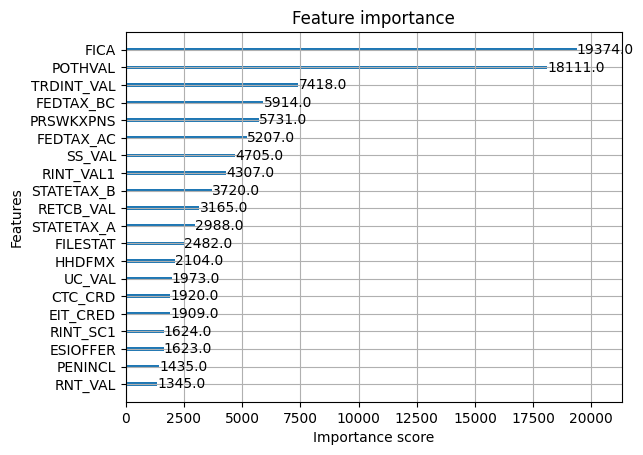

In [8]:
plt.figure(figsize=(20, 8))
plot_importance(xgb, max_num_features=20, importance_type='weight')
#‘weight’: the number of times a feature is used to split the data across all trees.
#‘gain’: the average gain across all splits the feature is used in.
#‘cover’: the average coverage across all splits the feature is used in.
#‘total_gain’: the total gain across all splits the feature is used in.
#‘total_cover’: the total coverage across all splits the feature is used in.
plt.show()